In [12]:
import pandas as pd
import numpy as np
import os

RAW_DATA_PATH = '../data/raw'
PROCESSED_DATA_PATH = '../data/processed'

course_df = pd.read_csv(os.path.join(RAW_DATA_PATH, 'course.csv'))
view_df = pd.read_csv(os.path.join(RAW_DATA_PATH, 'view.csv'))
user_df = pd.read_csv(os.path.join(RAW_DATA_PATH, 'user.csv'))
schedule_df = pd.read_csv(os.path.join(RAW_DATA_PATH, 'schedule.csv'))
teacher_df = pd.read_csv(os.path.join(RAW_DATA_PATH, 'teacher.csv'))
sub_df = pd.read_csv(os.path.join(RAW_DATA_PATH, 'sub.csv'))
pred_df = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'pred_df.csv'))


In [15]:
df_dict = {'course_df': course_df,
           'view_df': view_df,
           'user_df': user_df,
           'schedule_df': schedule_df,
           'teacher_df': teacher_df,
           'sub_df': sub_df,
           'pred_df': pred_df}

In [17]:
for k, v in df_dict.items():
    print(k, v.shape)

course_df (166, 3)
view_df (390762, 5)
user_df (36440, 7)
schedule_df (2759, 6)
teacher_df (165, 4)
sub_df (43629, 5)
pred_df (14936, 12)


## Analytics

- Premier biais: Le genre est corrélée avec certains cours aussi (aussi le top 10 des cours).
- Deuxième biais: l'âge. L'âge est corrélée avec certains cours. Pourriez-vous trouver lesquels ? (Indice ce sont des cours parmi les 10 plus vus).
- Troisième biais: la position géographique. Les parisiens et les provinciaux n'ont pas le même comportement en fonction des cours / des disciplines ?

**>>>** la table view sera votre meilleure alliée dans tous les cas.

In [41]:
big_df = (
    view_df.merge(schedule_df, on='schedule_id', how='left')
           .merge(course_df, on='course_id', how='left')
           .merge(user_df, on='user_id', how='left')
    )[['user_id', 'gender', 'watched_seconds', 'subject_name', 'course_title']]

,watched_seconds
course_title,
Cinématique,19313
Dynamique,16555
Mécanique,14369
Acoustique musicale,13230
Sociologie de l'art,12770
...,...
Philosophie de l'esprit,114
Méréologie,88
Économie de la santé,72


In [53]:
top_10_courses_count = (
       big_df.groupby('course_title')
             .agg({'watched_seconds': 'count'})
             .sort_values(by='watched_seconds', ascending=False)
)[:10].reset_index()['course_title'].to_list()

In [58]:
top_10_courses_sum = (
       big_df.groupby('course_title')
             .agg({'watched_seconds': 'sum'})
             .sort_values(by='watched_seconds', ascending=False)
)[:10].reset_index()['course_title'].to_list()

In [55]:
top_10_courses_sum

['Cinématique',
 'Acoustique musicale',
 'Dynamique',
 'Mécanique',
 'Méthodes formelles',
 'Aérostatique',
 'Théorie des graphes',
 "Sociologie de l'art",
 'Mécanique classique',
 'Physique du solide']

In [59]:
top_10_courses_count

['Cinématique',
 'Dynamique',
 'Mécanique',
 'Acoustique musicale',
 "Sociologie de l'art",
 'Méthodes formelles',
 'Mécanique classique',
 'Théorie des automates',
 'Probabilités',
 'Biophysique']

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Méthodes formelles'),
  Text(1, 0, 'Théorie des graphes'),
  Text(2, 0, 'Mécanique'),
  Text(3, 0, 'Aérostatique'),
  Text(4, 0, 'Dynamique'),
  Text(5, 0, "Sociologie de l'art"),
  Text(6, 0, 'Mécanique classique'),
  Text(7, 0, 'Cinématique'),
  Text(8, 0, 'Physique du solide'),
  Text(9, 0, 'Acoustique musicale')])

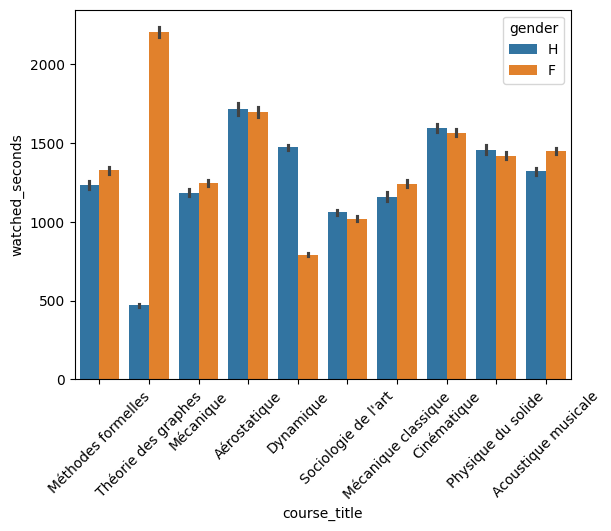

In [70]:
sns.barplot(data=big_df.loc[big_df['course_title'].isin(top_10_courses_sum)],
              x='course_title', y='watched_seconds', hue='gender')
plt.xticks(rotation=45)